In [1]:
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
successful_final_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/successful_final.csv', header=0)
print(len(successful_final_df))

8958


In [3]:
# # print(test_df['project'])
# java_projects = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/java_projects.csv', header=0)
# # print(java_projects['name'])
# filtered_df = java_projects[java_projects['name'].isin(test_df['project'])]
# print(len(filtered_df))
# filtered_df.to_csv('successful_final.csv', index=False)

In [4]:
# tpp_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/tests_per_project.csv', header=0)
# tpp_df = tpp_df[tpp_df['project'].isin(successful_final_df['name'])]
# tpp_df.to_csv('tests_per_project_final.csv', index=False)

# Only Apache Commons Project

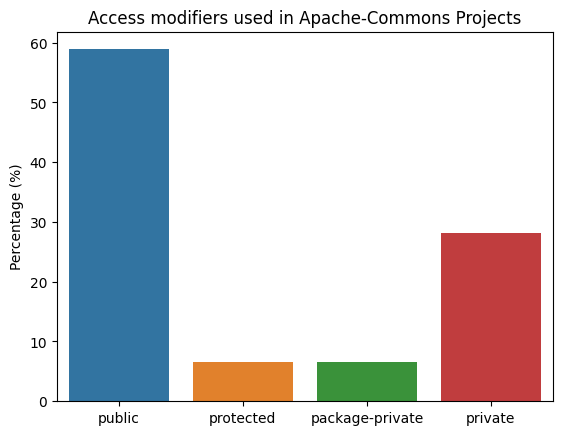

Total number of projects: 31
public_percent             58.876452
protected_percent           6.535161
package-private_percent     6.507419
private_percent            28.081935
dtype: float64
public             44745
protected           4523
private-package     4363
private            19556
dtype: int64


In [5]:
cut_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/cut_accessibility.csv', header=0)
cut_df = cut_df[cut_df['project'].isin(successful_final_df['name'])]
column_names = ['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']

cut_df = cut_df[cut_df['project'].str.startswith('apache-commons')]

# Calculate the mean of each column in the DataFrame
mean_values = cut_df[['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']].mean()
mean_df = pd.DataFrame({'Column': ['public', 'protected', 'package-private', 'private'], 'Mean': mean_values.values * 100})

sns.barplot(x='Column', y='Mean', data=mean_df)

# # Set labels and title
plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.title('Access modifiers used in Apache-Commons Projects')

# # Show the histogram
plt.show()
print("Total number of projects: " + str(len(cut_df)))
print(cut_df[['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']].mean() * 100)

print(cut_df[['public', 'protected', 'private-package', 'private']].sum())

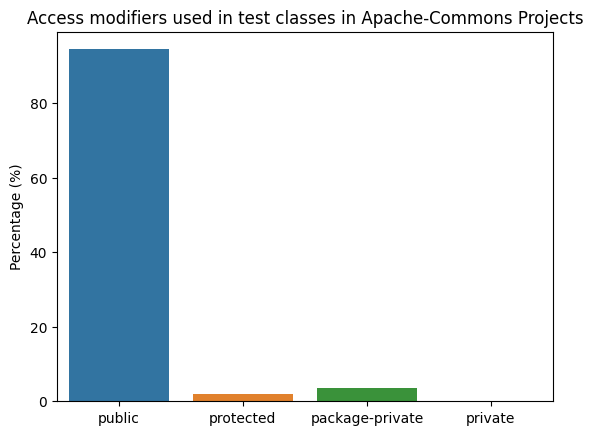

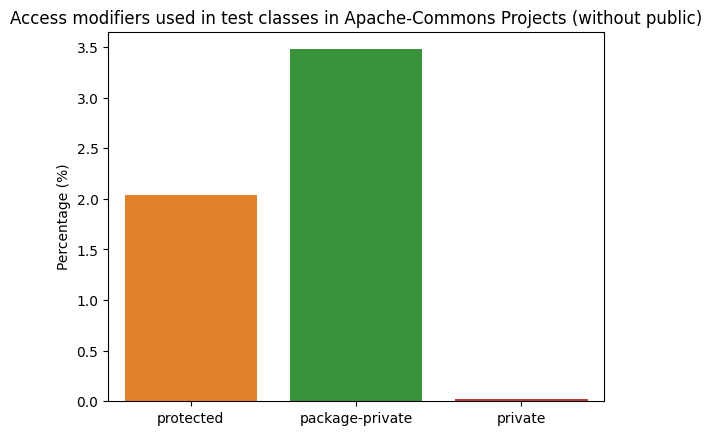

public_percent             94.463226
protected_percent           2.039355
package-private_percent     3.478387
private_percent             0.018387
dtype: float64
public             29812
protected            481
private-package      994
private               26
dtype: int64


In [9]:
test_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/test_accessibility.csv', header=0)
test_df = test_df[test_df['project'].isin(successful_final_df['name'])]
# print(test_df[test_df['public_percent'] == 0, test_df['protected_percent'] == 0])
column_names = ['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']

test_df = test_df[test_df['project'].str.startswith('apache-commons')]
# Calculate the mean of each column in the DataFrame
mean_values = test_df[['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']].mean()
mean_df = pd.DataFrame({'Column': ['public', 'protected', 'package-private', 'private'], 'Mean': mean_values.values * 100})

ax = sns.barplot(x='Column', y='Mean', data=mean_df)

# Set labels and title
plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.title('Access modifiers used in test classes in Apache-Commons Projects')

# Convert y-axis values to logarithmic percentage
# ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Set the y-axis to a logarithmic scale
# ax.set_yscale('log')

# Show the histogram
plt.show()

# Calculate the mean of each column in the DataFrame
mean_values = test_df[['protected_percent', 'package-private_percent', 'private_percent']].mean()
mean_df = pd.DataFrame({'Column': ['protected', 'package-private', 'private'], 'Mean': mean_values.values * 100})

sns.barplot(x='Column', y='Mean', data=mean_df, palette=sns.color_palette().as_hex()[1:])

# Set labels and title
plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.title('Access modifiers used in test classes in Apache-Commons Projects (without public)')

# Show the histogram
plt.show()
print(test_df[['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']].mean() * 100)

print(test_df[['public', 'protected', 'private-package', 'private']].sum())

In [22]:
test_df = pd.read_csv('/Users/firhard/Desktop/test-visibility-checker/test_accessibility.csv', header=0)
test_df = test_df[test_df['project'].isin(successful_final_df['name'])]
# print(test_df[test_df['public_percent'] == 0, test_df['protected_percent'] == 0])
column_names = ['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']

test_df = test_df[test_df['project'].str.startswith('apache-commons')]
# Calculate the mean of each column in the DataFrame
mean_values = test_df[['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']].mean()
mean_df = pd.DataFrame({'Column': ['public', 'protected', 'package-private', 'private'], 'Mean': mean_values.values * 100})

# Calculate the mean of each column in the DataFrame
mean_values = test_df[['protected_percent', 'package-private_percent', 'private_percent']].mean()
mean_df = pd.DataFrame({'Column': ['protected', 'package-private', 'private'], 'Mean': mean_values.values * 100})

# print(test_df[['public_percent', 'protected_percent', 'package-private_percent', 'private_percent']].mean() * 100)
# print()
# print(test_df[['public', 'protected', 'private-package', 'private']].sum())

print(test_df[test_df['private'] > 0][['project', 'private','public','protected','private-package']])

                      project  private  public  protected  private-package
663    apache-commons-numbers        2    1390          0              118
858       apache-commons-dbcp        1    1327          8               14
1040      apache-commons-lang        2    5707         58               44
3515      apache-commons-math       20    6537         45               62
6305  apache-commons-compress        1    2624         18               96


In [23]:
print(test_df[test_df['project'] == 'apache-commons-dbcp'])

                 project  public  protected  private-package  private  \
858  apache-commons-dbcp    1327          8               14        1   

     public_percent  protected_percent  package-private_percent  \
858           0.983             0.0059                   0.0104   

     private_percent  
858           0.0007  
